## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
data = pd.read_csv("../data/Telecom-Churn.csv")
data = data.drop(columns=['SeniorCitizen','CustomerID','Partner','Dependents','PaperlessBilling'])
data.head()

,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [4]:
# YOUR CODE HERE
data.describe()

,Tenure,MonthlyCharges
count,7043.000000,7017.000000
mean,32.371149,64.707482
std,24.559481,30.105503
min,0.000000,18.250000
25%,9.000000,35.400000
50%,29.000000,70.300000
75%,55.000000,89.850000
max,72.000000,118.750000


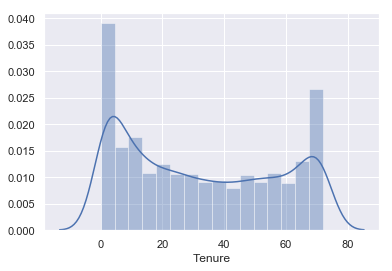

In [5]:
g = sns.distplot(data['Tenure'])

C:\Users\hajdu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hajdu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


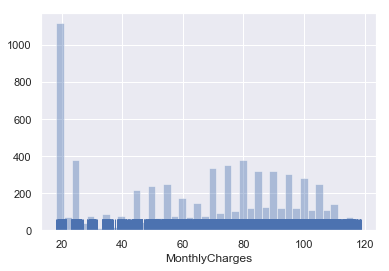

In [8]:
g = sns.distplot(data['MonthlyCharges'], kde=False, bins=40, rug=True)

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [ ]:
# YOUR CODE HERE

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [ ]:
# YOUR CODE HERE

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [ ]:
# YOUR CODE HERE

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [ ]:
# YOUR CODE HERE

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [ ]:
# YOUR CODE HERE

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [ ]:
# YOUR CODE HERE

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [ ]:
# YOUR CODE HERE

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [ ]:
# YOUR CODE HERE

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [ ]:
# YOUR CODE HERE

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [ ]:
# YOUR CODE HERE